In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
iri = pd.read_csv("Iris.csv")
iri.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
sns.set(style = "white", color_codes = True)

In [6]:
iri['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Scatter-plot'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

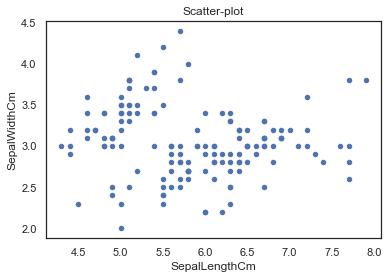

In [8]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the iri features.
iri.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm", title = "Scatter-plot")

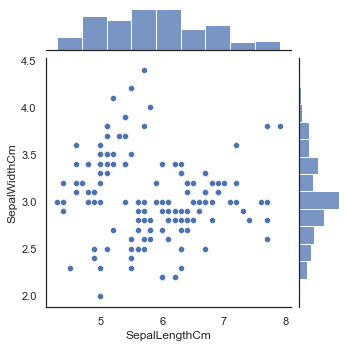

In [14]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same fig
sns.jointplot(x = "SepalLengthCm", y = "SepalWidthCm", data = iri, size = 5)

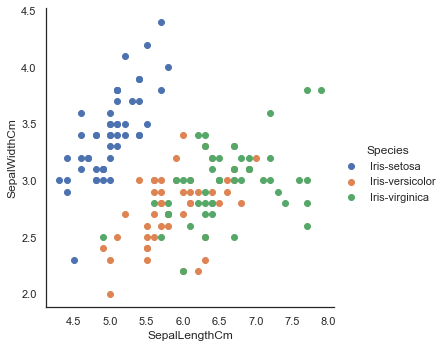

In [15]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iri, hue = "Species", size = 5) \
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
    .add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

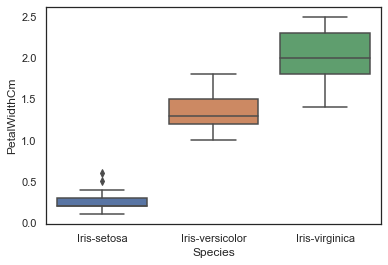

In [16]:
# boxplot vizulization
sns.boxplot(x = "Species", y = "PetalWidthCm", data = iri)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

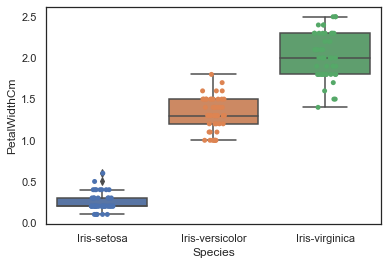

In [17]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
sns.boxplot(x = "Species", y = "PetalWidthCm", data = iri)
sns.stripplot(x = "Species", y = "PetalWidthCm", data = iri, jitter=True, edgecolor="gray")

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

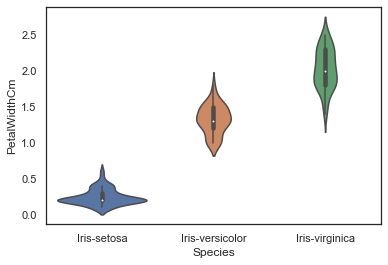

In [19]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot

sns.violinplot(x = "Species", y = "PetalWidthCm", data = iri, size = 6)

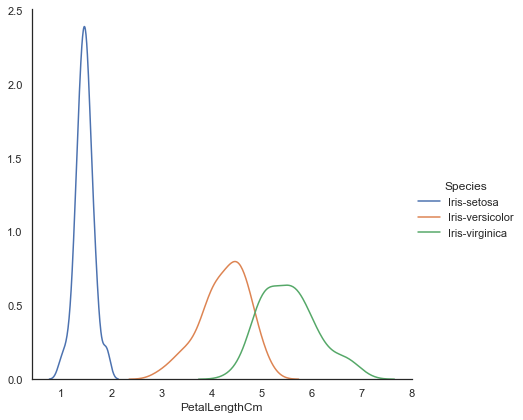

In [20]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(iri, hue = "Species", size = 6) \
    .map(sns.kdeplot, "PetalLengthCm") \
    .add_legend()

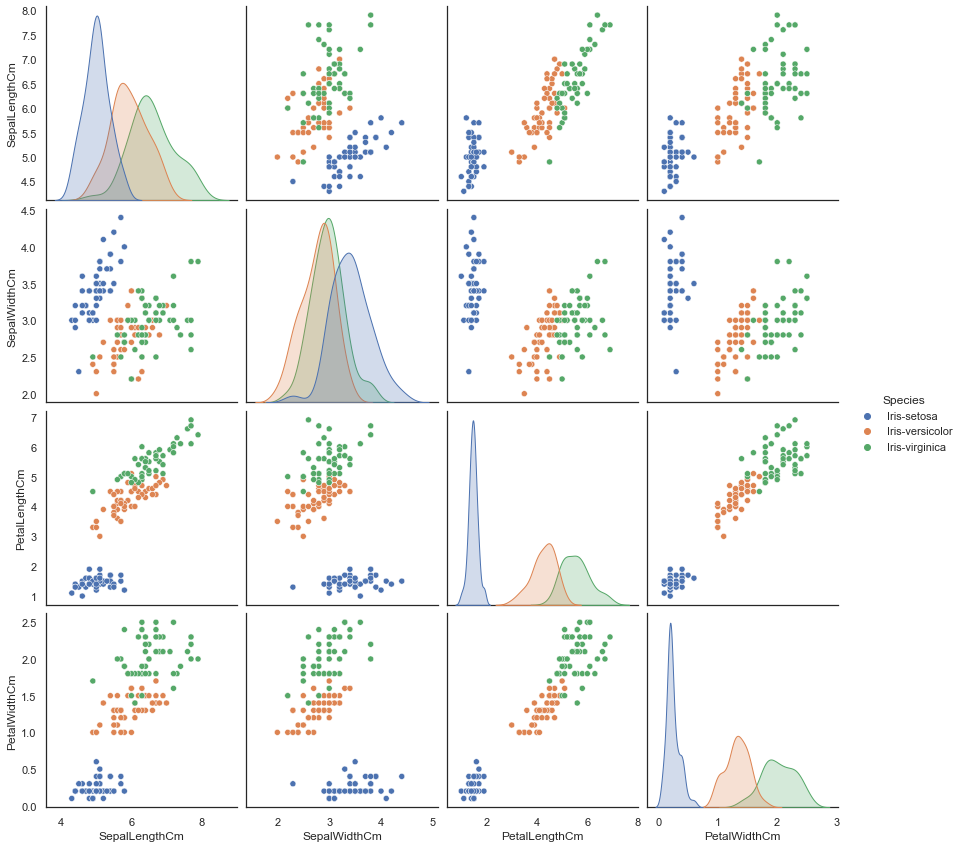

In [24]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations

sns.pairplot(iri.drop("Id", axis = 1), hue = "Species", size = 3, diag_kind = "kde")

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

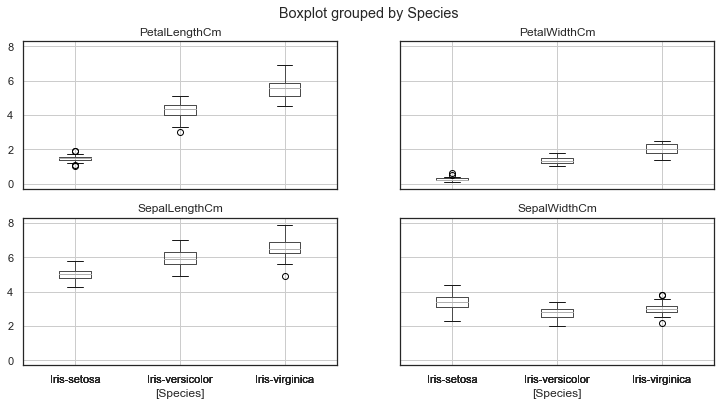

In [26]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde

iri.drop("Id", axis = 1).boxplot(by = "Species", figsize = (12,6))

<AxesSubplot:>

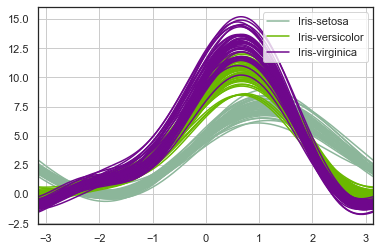

In [46]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
# and after that plotting these
pd.plotting.andrews_curves(iri.drop("Id", axis = 1), "Species")

<AxesSubplot:>

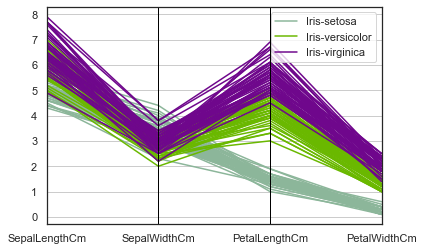

In [48]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample

pd.plotting.parallel_coordinates(iri.drop("Id", axis = 1), "Species")

<AxesSubplot:>

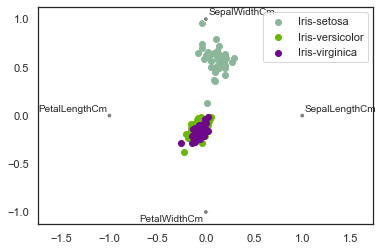

In [49]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
pd.plotting.radviz(iri.drop("Id", axis = 1), "Species")